# BERT Tutorial: Using BERTopic For Topic Modelling

#### **<ins>Version:</ins>**
@Feb 2023 / Quek Jing Hao

#### _<ins>**Objective</ins>:**_ 

This notebook takes you through a sample implementation of BERTopic for topic modelling. 


#### **<ins>Introduction:</ins>**

Topic modelling is a method for unsupervised clustering of documents which allow us to find groups that form naturally between the documents. The model is able to identify topic clusters inside the corpus. This method is useful becasue it elucidates the common topics or themes that appear throughout the corpus. 

There exist other packages or models that allow one to do topic modelling, such as LDA or Pycaret. However, one particular challenge with topic modelling is that the topics may not always be easy to tell. In other words, it may be difficult to represent a topic with a single word. Hence, a _topic_ may be an abstract unsupervised clsuter picked up by the model after training. 

Here, we introduce BERTopic. BERTopic is an extremely powerful model because it is very clear what topic a certain cluster represents. Nonetheless, installing the module may be challenging, as one of its dependency - hdbscan - is a pain to install as well. Hence, I suggest to work with BERTopic in Google Colab - where you just download all the required dependencies in their cloud, and not worry about being able to do so on your local machine.

~_Until some department wakes up their idea and provision an enterprise level Azure machine learning cloud, we have to run the notebook locally or use Colab_~

You can choose to use either the GPU or CPU on Colab.

### Environment Configuration

We set up the environment for Google Colab

In [ ]:
# download dependencies
%%capture
!pip install bertopic

In [ ]:
detected_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
try:
    device_name = torch.cuda.get_device_name()
except:
    device_name = 'CPU'
print(f'Detected device: {device_name}')

We will download the sample IMDB dataset 

In [ ]:
!git clone https://github.com/QuekJingHao/imdb-sample-dataset.git

/content/drive/MyDrive/Natural Language Processing Repository (to be transfered to ODI)


In [ ]:
# import modules and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
import re
import nltk
import time
import sys

from bertopic import BERTopic

from wordcloud import WordCloud
from matplotlib.pyplot import figure
                
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

### Read Amazon Reviews Dataset

The sample dataset we use will be the Amazon phone reviews dataset. We just need to work with the reviews column. Because the original dataset is so big, we just take a sample of the dataset in this exercise. We pick say, 10000 reviews. We select a subdataframe consisting only of columns Reviews and Rating

In [ ]:
df = pd.read_csv(dataset_path).astype({'Reviews' : str})

df_sample = df.copy()
df_sample = df_sample.sample(n = 10000, random_state = 78)[['Reviews', 'Rating']].reset_index(drop  =True)

df_sample.head()

,Reviews,Rating
0,"Let me just say that this came so quick it was crazy. I wasn't expecting it so soon. It was bigger than I thought, but it's a really flattering phone. It works wonderfully! Thanks so much!",5
1,The rubber inner-sleeve does not look good on the phone.,2
2,"It came on time, product as described. Very pleased with the purchase :)",5
3,working as I expected it,4
4,"We're having problems, getting the sim card for this phone. My grandson is not happy. We've contacted the Apple store and they don't have it.",2


### Data Cleaning

We can do some cleaning on the text. This is completely up to the user what kind of cleaning you want to do. It is good practise to put all the cleaning steps in a defined function. As an example, the only cleaning step I will do is to make all words lower case

In [ ]:
def text_processing(text):
    return text.lower()

In [ ]:
df_sample['Cleaned Reviews'] = df_sample['Reviews'].apply(text_processing)

# select only the reviews column and convert the series into a list
Reviews = list(df_sample['Cleaned Reviews'])

print(f'Length of Reviews: {len(Reviews)}')

Length of Reviews: 10000


### Loading BERTopic 

Now we are ready to use BERTopic! We would need to load the model, and fit it with the reviews text we have


In [ ]:
topic_model = BERTopic(verbose = True)
topics, probs = topic_model.fit_transform(Reviews)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2023-02-27 02:41:31,115 - BERTopic - Transformed documents to Embeddings
2023-02-27 02:41:59,252 - BERTopic - Reduced dimensionality
2023-02-27 02:41:59,730 - BERTopic - Clustered reduced embeddings


### Display word clouds

We can first define a helper function to help us plot the word clouds

In [ ]:
def topic_wordcloud(topic_model, topic, width, height):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(width = 1200, 
                   height = 800,
                   background_color = "white", 
                   max_words = 500, 
                  random_state = 1)
    wc.generate_from_frequencies(text)

    mpp.figure(topic, (width, height), dpi = 200)
    frame1 = mpp.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    mpp.imshow(wc, interpolation = 'bilinear')
    mpp.axis('off')

    mpp.show()

Now, lets say we want to plot 10 wordclouds from the topics

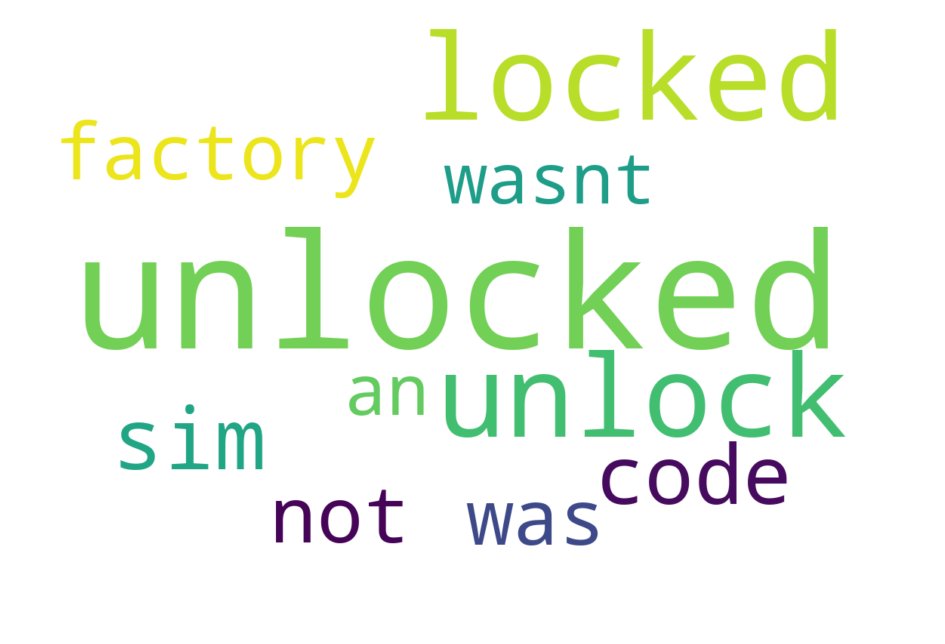

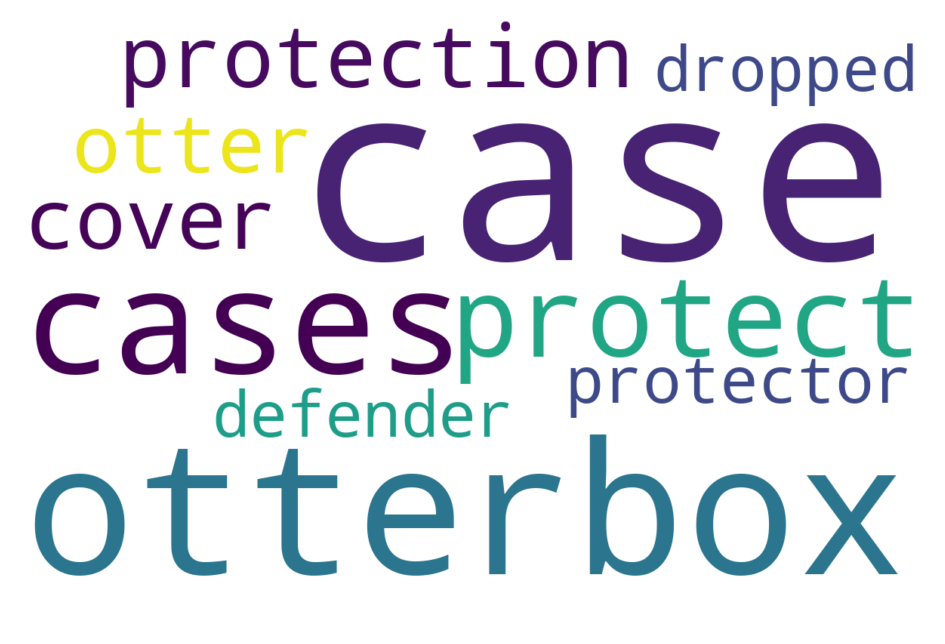

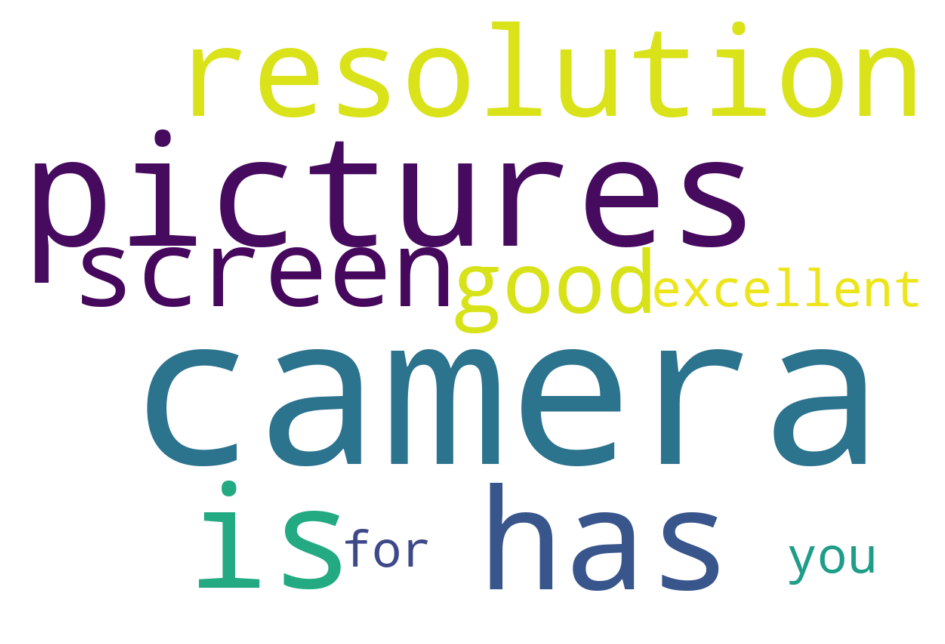

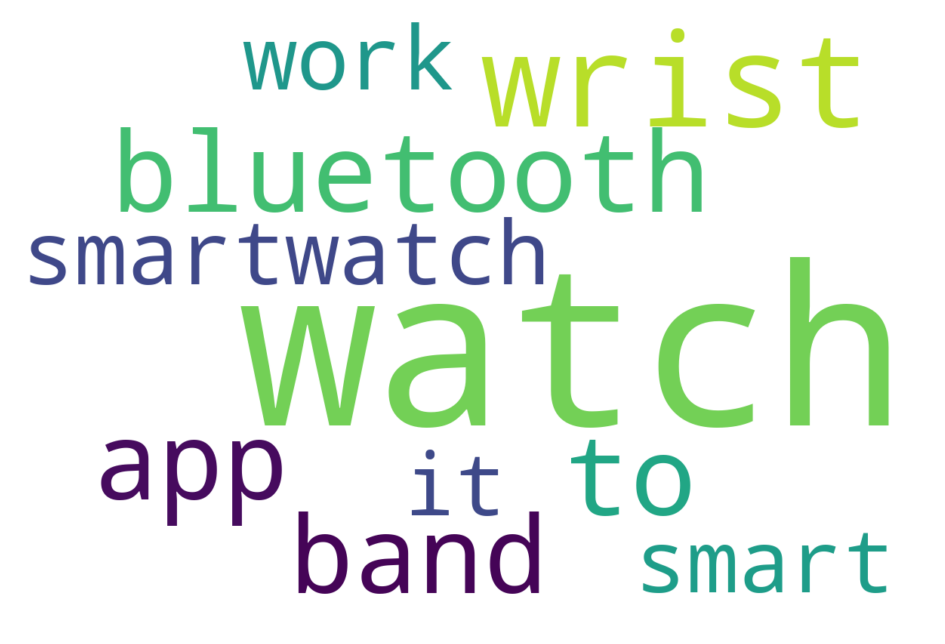

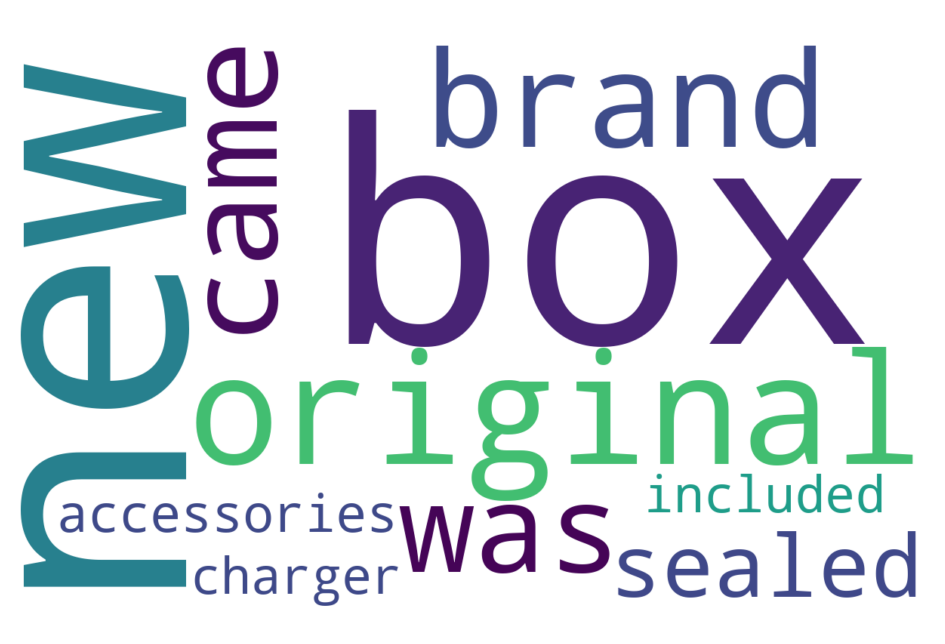

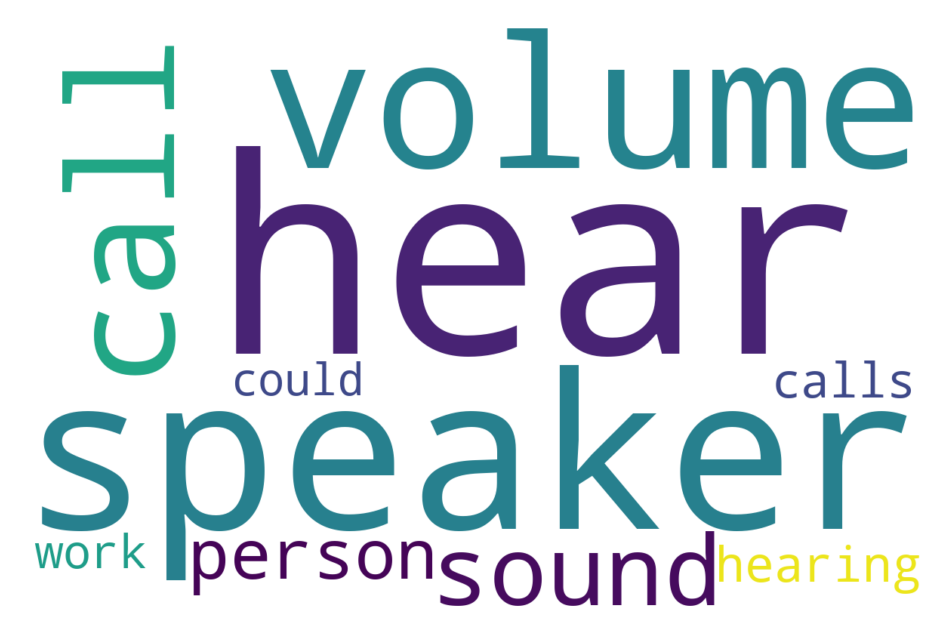

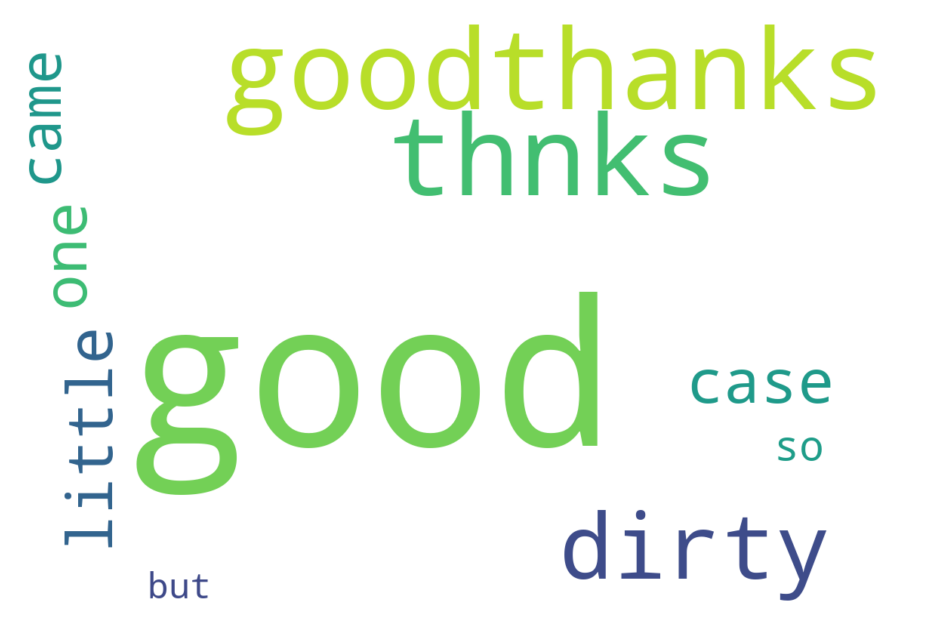

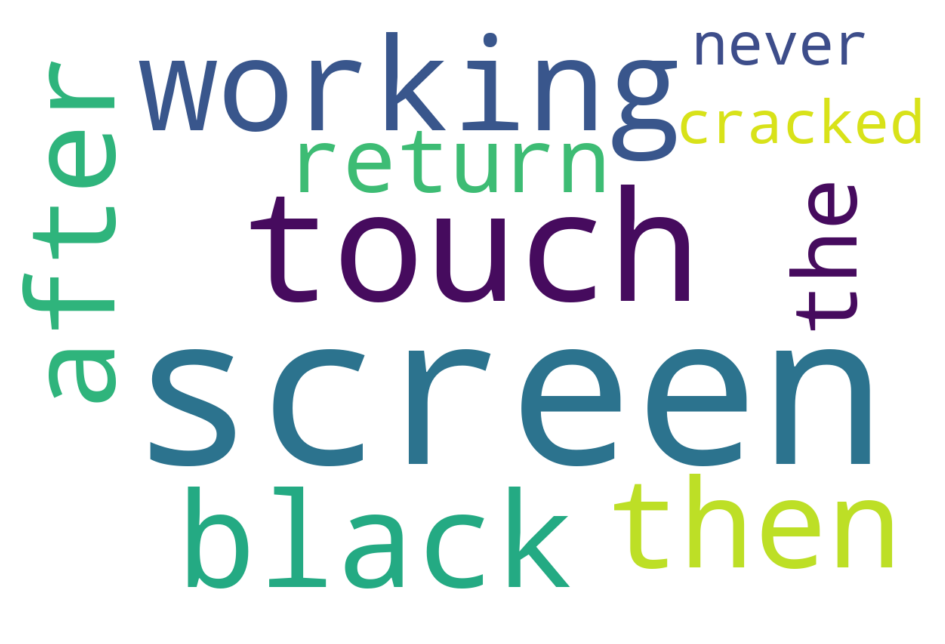

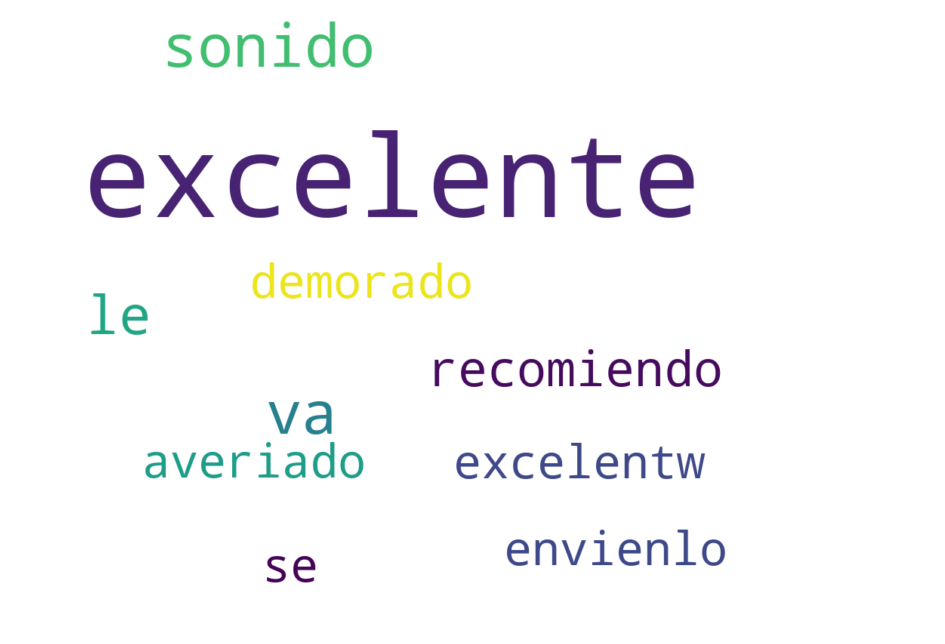

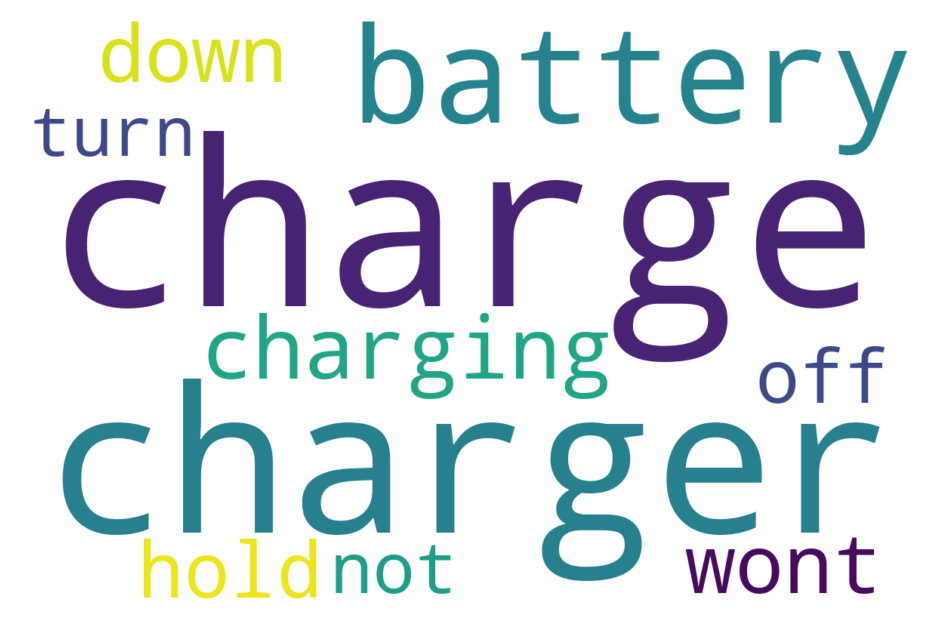

CPU times: user 14.4 s, sys: 1.22 s, total: 15.6 s
Wall time: 15 s


In [ ]:
%%time
# Generate word cloud and save the topic word clouds
for i in range(10):
    topic_wordcloud(topic_model = topic_model, topic = i, width = 12, height = 4)